# Embeddings Demonstration

This notebook illustrates the use of embeddings for natural language processing tasks.

## What are Embeddings?

Embeddings are numerical representations (vectors) of text, words, or other data that capture semantic meaning. Similar items have similar embeddings, making them useful for:
- Semantic search
- Recommendation systems
- Clustering and classification
- Text similarity comparison


## Setup

First, let's install and import the necessary libraries. We'll use:
- `sentence-transformers` for pre-trained embedding models
- `numpy` for numerical operations
- `matplotlib` and `seaborn` for visualization
- `sklearn` for dimensionality reduction and metrics


In [1]:
# Install required packages (uncomment if needed)
# !pip install sentence-transformers numpy matplotlib seaborn scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully!")


Matplotlib is building the font cache; this may take a moment.


✓ Libraries imported successfully!


## 1. Creating Embeddings

Let's start by loading a pre-trained embedding model. We'll use the `all-MiniLM-L6-v2` model, which is:
- Lightweight and fast
- Good for general-purpose sentence embeddings
- Produces 384-dimensional vectors


In [2]:
# Load the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example sentences
sentences = [
    "The cat sits on the mat",
    "A feline rests on a rug",
    "The dog plays in the park",
    "Python is a programming language",
    "Machine learning models need data"
]

# Generate embeddings
embeddings = model.encode(sentences)

print(f"Number of sentences: {len(sentences)}")
print(f"Embedding shape: {embeddings.shape}")
print(f"Each sentence is represented by a {embeddings.shape[1]}-dimensional vector")
print(f"\nFirst embedding (first 10 dimensions):\n{embeddings[0][:10]}")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Number of sentences: 5
Embedding shape: (5, 384)
Each sentence is represented by a 384-dimensional vector

First embedding (first 10 dimensions):
[ 0.13489066 -0.03206331 -0.02033524  0.035901   -0.02833313  0.0415021
  0.03315871  0.03660563  0.00861659  0.03763951]


## 2. Semantic Similarity

One of the key uses of embeddings is measuring how similar two pieces of text are. We use **cosine similarity** to measure the angle between vectors:
- 1.0 = identical meaning
- 0.0 = unrelated
- -1.0 = opposite meaning


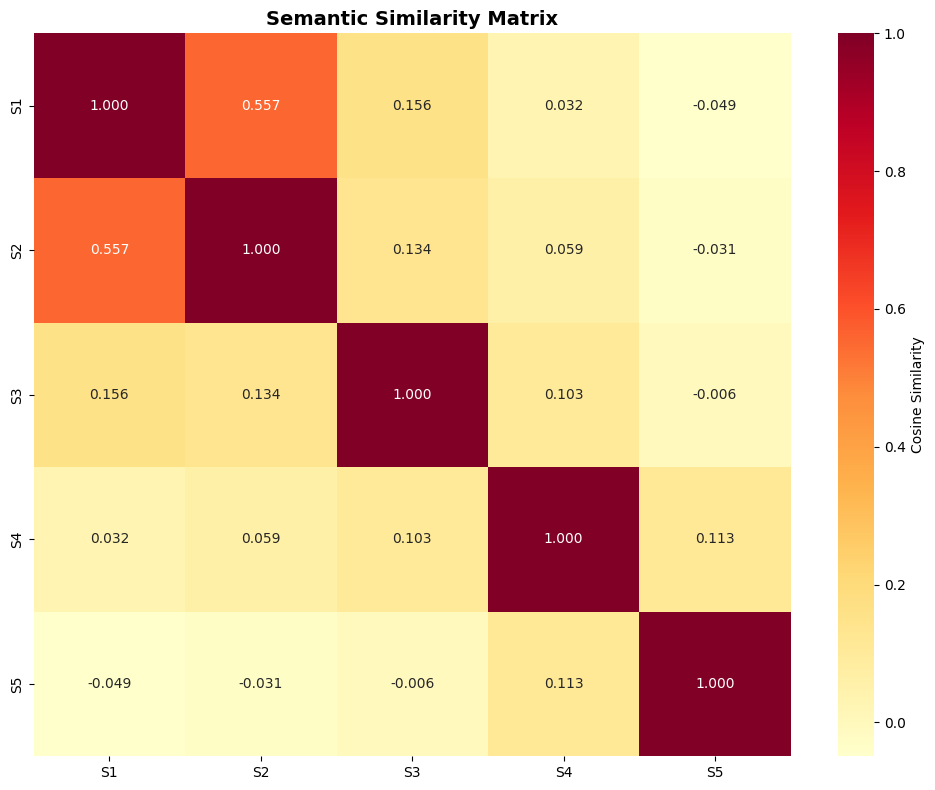


Sentence Pairs and Similarities:
----------------------------------------------------------------------
'The cat sits on the mat' 
  vs 
'A feline rests on a rug'
  Similarity: 0.557

'The cat sits on the mat' 
  vs 
'The dog plays in the park'
  Similarity: 0.156

'The cat sits on the mat' 
  vs 
'Python is a programming language'
  Similarity: 0.032

'The cat sits on the mat' 
  vs 
'Machine learning models need data'
  Similarity: -0.049

'A feline rests on a rug' 
  vs 
'The dog plays in the park'
  Similarity: 0.134

'A feline rests on a rug' 
  vs 
'Python is a programming language'
  Similarity: 0.059

'A feline rests on a rug' 
  vs 
'Machine learning models need data'
  Similarity: -0.031

'The dog plays in the park' 
  vs 
'Python is a programming language'
  Similarity: 0.103

'The dog plays in the park' 
  vs 
'Machine learning models need data'
  Similarity: -0.006

'Python is a programming language' 
  vs 
'Machine learning models need data'
  Similarity: 0.113



In [3]:
# Calculate pairwise cosine similarity
similarity_matrix = cosine_similarity(embeddings)

# Display the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='YlOrRd',
            xticklabels=[f"S{i+1}" for i in range(len(sentences))],
            yticklabels=[f"S{i+1}" for i in range(len(sentences))],
            cbar_kws={'label': 'Cosine Similarity'})
plt.title('Semantic Similarity Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print sentence pairs with their similarities
print("\nSentence Pairs and Similarities:")
print("-" * 70)
for i in range(len(sentences)):
    for j in range(i+1, len(sentences)):
        sim = similarity_matrix[i][j]
        print(f"'{sentences[i]}' \n  vs \n'{sentences[j]}'")
        print(f"  Similarity: {sim:.3f}\n")


## 3. Visualizing Embeddings

Embeddings are high-dimensional (384 dimensions in our case), which makes them hard to visualize directly. We can use **PCA (Principal Component Analysis)** to reduce them to 2D or 3D for visualization.


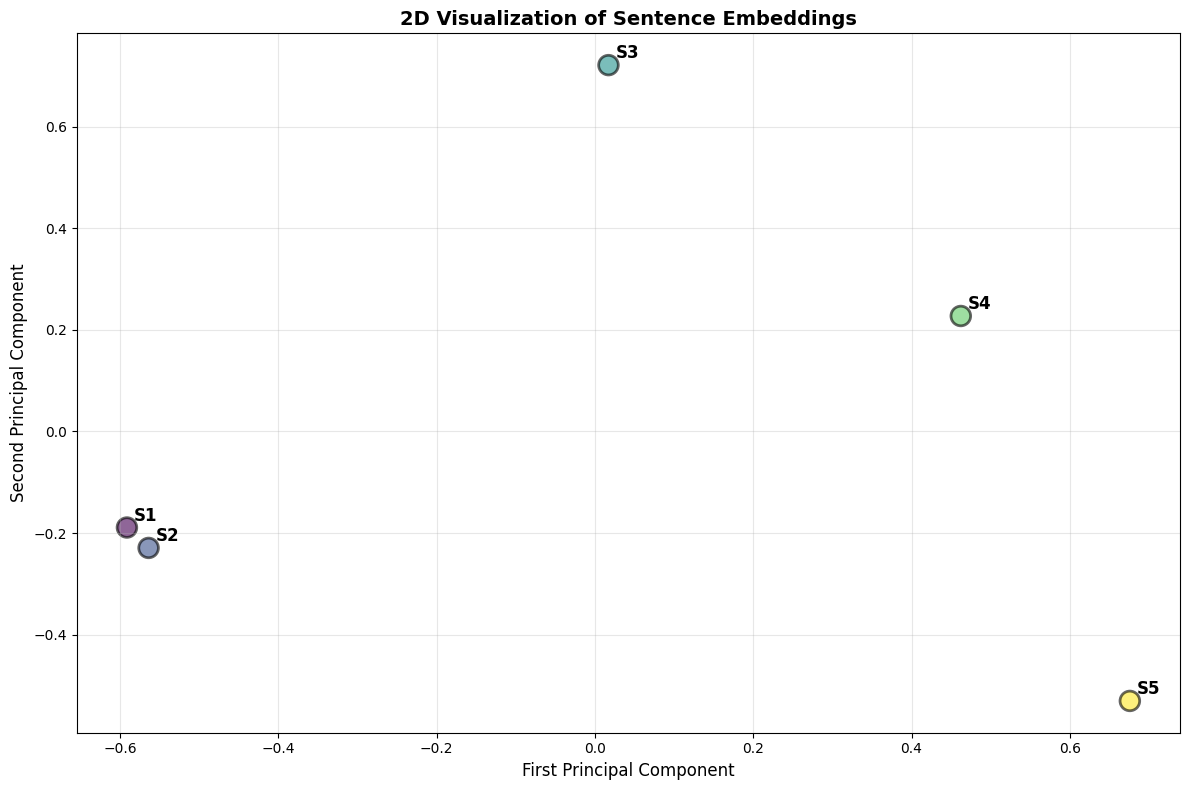

Legend:
S1: The cat sits on the mat
S2: A feline rests on a rug
S3: The dog plays in the park
S4: Python is a programming language
S5: Machine learning models need data


In [4]:
# Reduce embeddings to 2D using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Create visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], 
                     s=200, c=range(len(sentences)), cmap='viridis', 
                     alpha=0.6, edgecolors='black', linewidth=2)

# Add labels for each point
for i, sentence in enumerate(sentences):
    plt.annotate(f"S{i+1}", 
                xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=12, fontweight='bold')

plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('2D Visualization of Sentence Embeddings', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print the legend
print("Legend:")
for i, sentence in enumerate(sentences):
    print(f"S{i+1}: {sentence}")


## 4. Practical Use Case: Semantic Search

Let's build a simple semantic search engine that finds the most relevant documents based on a query.


In [5]:
# Create a knowledge base of documents
documents = [
    "Python is a high-level programming language known for its simplicity",
    "Machine learning is a subset of artificial intelligence",
    "Deep learning uses neural networks with multiple layers",
    "Natural language processing helps computers understand human language",
    "Computer vision enables machines to interpret visual information",
    "Data science combines statistics, programming, and domain expertise",
    "Cloud computing provides on-demand access to computing resources",
    "Blockchain is a distributed ledger technology",
    "Quantum computing uses quantum mechanics for computation",
    "Cybersecurity protects systems from digital attacks"
]

# Encode all documents
document_embeddings = model.encode(documents)

def semantic_search(query, top_k=3):
    """
    Perform semantic search to find the most relevant documents
    """
    # Encode the query
    query_embedding = model.encode([query])
    
    # Calculate similarities
    similarities = cosine_similarity(query_embedding, document_embeddings)[0]
    
    # Get top-k results
    top_indices = np.argsort(similarities)[::-1][:top_k]
    
    # Display results
    print(f"Query: '{query}'")
    print("=" * 80)
    for rank, idx in enumerate(top_indices, 1):
        print(f"\nRank {rank}: (Similarity: {similarities[idx]:.4f})")
        print(f"  {documents[idx]}")
    print("=" * 80)
    
    return top_indices, similarities[top_indices]

# Test the semantic search
print("Test 1: AI-related query\n")
semantic_search("How do machines learn from data?", top_k=3)


Test 1: AI-related query

Query: 'How do machines learn from data?'

Rank 1: (Similarity: 0.5394)
  Machine learning is a subset of artificial intelligence

Rank 2: (Similarity: 0.5169)
  Computer vision enables machines to interpret visual information

Rank 3: (Similarity: 0.4084)
  Natural language processing helps computers understand human language


(array([1, 4, 3]), array([0.539423  , 0.51693785, 0.40840906], dtype=float32))

In [6]:
print("\nTest 2: Security-related query\n")
semantic_search("How to protect against hackers?", top_k=3)



Test 2: Security-related query

Query: 'How to protect against hackers?'

Rank 1: (Similarity: 0.5422)
  Cybersecurity protects systems from digital attacks

Rank 2: (Similarity: 0.1362)
  Blockchain is a distributed ledger technology

Rank 3: (Similarity: 0.1032)
  Computer vision enables machines to interpret visual information


(array([9, 7, 4]), array([0.5422267 , 0.13624744, 0.10324457], dtype=float32))

In [7]:
print("\nTest 3: Programming-related query\n")
semantic_search("What's the best language for beginners?", top_k=3)



Test 3: Programming-related query

Query: 'What's the best language for beginners?'

Rank 1: (Similarity: 0.4572)
  Python is a high-level programming language known for its simplicity

Rank 2: (Similarity: 0.2576)
  Natural language processing helps computers understand human language

Rank 3: (Similarity: 0.0970)
  Data science combines statistics, programming, and domain expertise


(array([0, 3, 5]), array([0.45718384, 0.2575868 , 0.09702481], dtype=float32))

## 5. Clustering Documents by Similarity

Let's visualize how documents cluster together based on their semantic meaning.


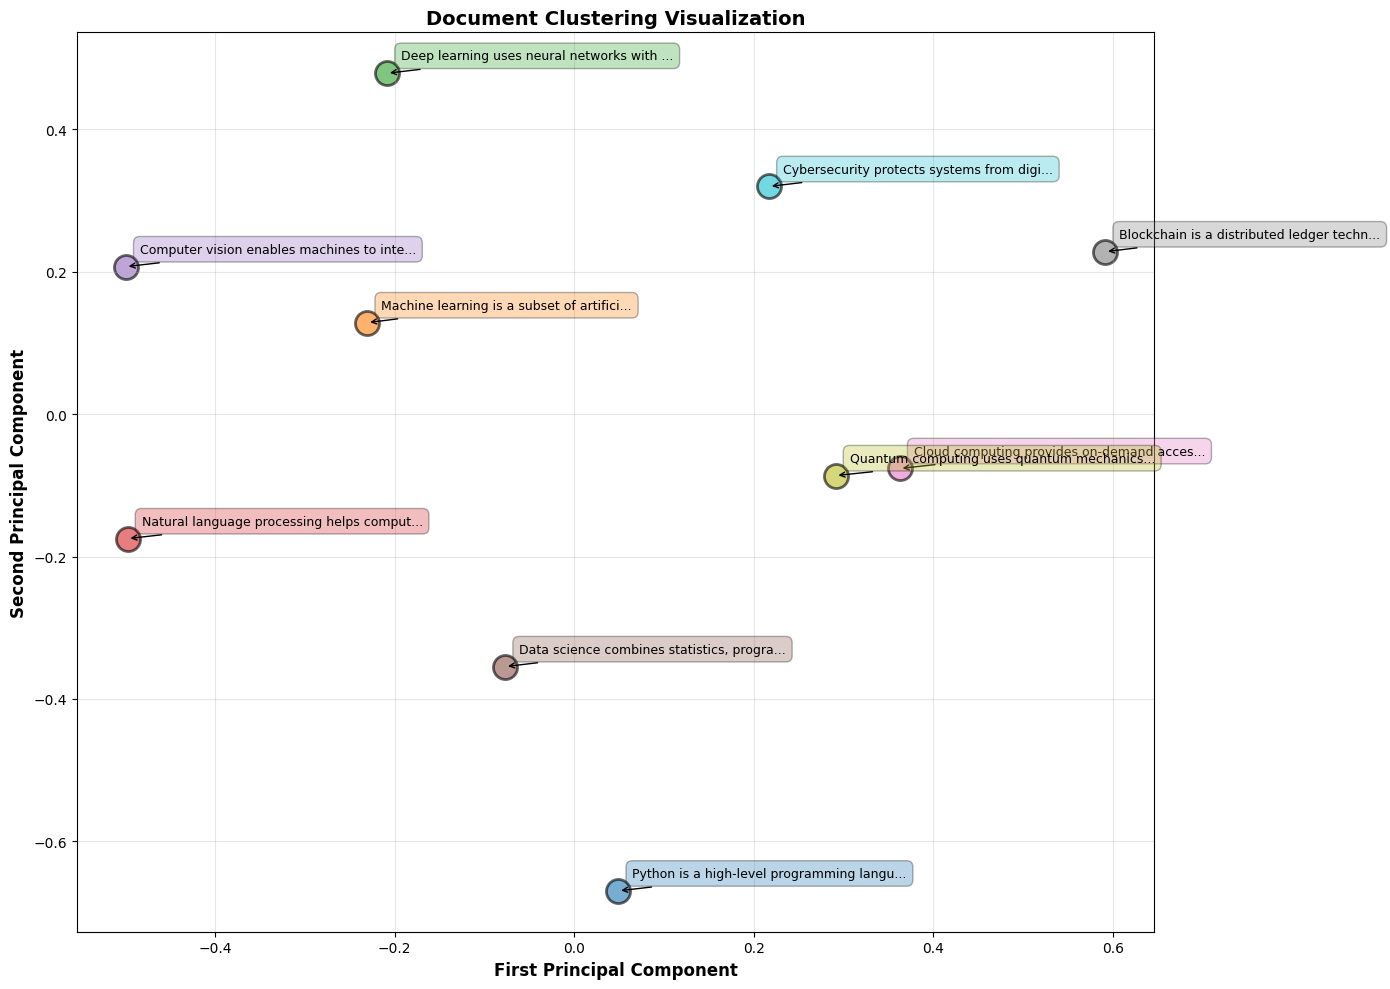

In [8]:
# Reduce document embeddings to 2D
pca_docs = PCA(n_components=2)
doc_embeddings_2d = pca_docs.fit_transform(document_embeddings)

# Create a more detailed visualization
plt.figure(figsize=(14, 10))
colors = plt.cm.tab10(np.linspace(0, 1, len(documents)))

for i, (doc, color) in enumerate(zip(documents, colors)):
    x, y = doc_embeddings_2d[i]
    plt.scatter(x, y, s=300, c=[color], alpha=0.6, edgecolors='black', linewidth=2)
    
    # Add document labels (truncated for readability)
    label = doc[:40] + "..." if len(doc) > 40 else doc
    plt.annotate(label, 
                xy=(x, y),
                xytext=(10, 10), 
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.5', facecolor=color, alpha=0.3),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.xlabel('First Principal Component', fontsize=12, fontweight='bold')
plt.ylabel('Second Principal Component', fontsize=12, fontweight='bold')
plt.title('Document Clustering Visualization', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 6. Understanding Similarity Scores

Let's compare different text pairs to understand what similarity scores mean in practice.


In [9]:
# Define text pairs with different levels of similarity
text_pairs = [
    ("The weather is sunny today", "It's a beautiful day with clear skies"),
    ("I love eating pizza", "Pizza is my favorite food"),
    ("The stock market crashed", "Investors lost money in the market"),
    ("I love eating pizza", "The weather is sunny today"),
    ("Machine learning is fascinating", "The sunset was beautiful yesterday"),
    ("Paris is the capital of France", "France's capital city is Paris")
]

# Calculate and display similarities
print("Text Pair Similarity Analysis")
print("=" * 80)

for text1, text2 in text_pairs:
    emb1 = model.encode([text1])
    emb2 = model.encode([text2])
    similarity = cosine_similarity(emb1, emb2)[0][0]
    
    # Determine relationship
    if similarity > 0.7:
        relationship = "Very Similar (Paraphrases/Same Topic)"
    elif similarity > 0.4:
        relationship = "Somewhat Related"
    else:
        relationship = "Unrelated"
    
    print(f"\n📝 Text 1: '{text1}'")
    print(f"📝 Text 2: '{text2}'")
    print(f"🔍 Similarity: {similarity:.4f} - {relationship}")
    print("-" * 80)


Text Pair Similarity Analysis

📝 Text 1: 'The weather is sunny today'
📝 Text 2: 'It's a beautiful day with clear skies'
🔍 Similarity: 0.5341 - Somewhat Related
--------------------------------------------------------------------------------

📝 Text 1: 'I love eating pizza'
📝 Text 2: 'Pizza is my favorite food'
🔍 Similarity: 0.8414 - Very Similar (Paraphrases/Same Topic)
--------------------------------------------------------------------------------

📝 Text 1: 'The stock market crashed'
📝 Text 2: 'Investors lost money in the market'
🔍 Similarity: 0.6705 - Somewhat Related
--------------------------------------------------------------------------------

📝 Text 1: 'I love eating pizza'
📝 Text 2: 'The weather is sunny today'
🔍 Similarity: 0.0763 - Unrelated
--------------------------------------------------------------------------------

📝 Text 1: 'Machine learning is fascinating'
📝 Text 2: 'The sunset was beautiful yesterday'
🔍 Similarity: 0.0867 - Unrelated
-----------------------------

## 7. Key Takeaways and Applications

### What we learned:
1. **Embeddings** convert text into numerical vectors that capture semantic meaning
2. **Cosine similarity** measures how related two pieces of text are
3. **Dimensionality reduction** (PCA) helps visualize high-dimensional embeddings
4. **Semantic search** finds relevant documents based on meaning, not just keywords

### Real-world Applications:
- **Search Engines**: Finding relevant content based on user queries
- **Recommendation Systems**: Suggesting similar items or content
- **Chatbots**: Understanding user intent and matching to responses
- **Document Classification**: Automatically categorizing text
- **Duplicate Detection**: Finding similar or duplicate content
- **Question Answering**: Matching questions to answers in a knowledge base

### Next Steps:
- Try different embedding models (e.g., OpenAI, Cohere, or larger models)
- Experiment with multilingual embeddings
- Build a vector database for large-scale semantic search
- Fine-tune embeddings for domain-specific tasks


# Additional example: Finding odd one out
print("Finding the Odd One Out\n")
print("=" * 80)

test_groups = [
    ["apple", "banana", "orange", "car", "grape"],
    ["Python", "Java", "C++", "hamburger", "JavaScript"],
    ["run", "walk", "jog", "sleep", "sprint"]
]

for group in test_groups:
    # Get embeddings for all items
    group_embeddings = model.encode(group)
    
    # Calculate average similarity of each item to all others
    avg_similarities = []
    for i in range(len(group)):
        # Calculate similarity to all other items
        sims = []
        for j in range(len(group)):
            if i != j:
                sim = cosine_similarity([group_embeddings[i]], [group_embeddings[j]])[0][0]
                sims.append(sim)
        avg_similarities.append(np.mean(sims))
    
    # The one with lowest average similarity is the outlier
    outlier_idx = np.argmin(avg_similarities)
    
    print(f"\nGroup: {group}")
    print(f"Outlier: '{group[outlier_idx]}' (avg similarity: {avg_similarities[outlier_idx]:.3f})")
    print("-" * 80)
